In [220]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

dataset = pd.read_csv('dataset_desafio_final.csv')

In [221]:
dataset.head()

,Unnamed: 0,Identificador_cliente,Empregador,qtd_integradas,qtd_NAO_integradas,Taxa_de_juros,qtd_integrada_refin,qtd_integrada_port,qtd_integrada_normal,qtd_parcelas,valor_principal,Sexo,Cidade,Estado,Renda,Idade,Classe
0,0,1,22.0,0,3,1.454243,0,0,0,32.0,20962.756667,F,CAMPINA G DO SUL,PR,8040000.00,74.0,5
1,1,2,49.0,0,3,1.683234,0,0,0,60.0,14707.066667,F,NaN,NaN,4020000.00,41.0,5
2,2,3,22.0,0,1,1.237440,0,0,0,12.0,7118.530000,M,12,SP,804000.00,48.0,2
3,3,4,3325.0,0,1,1.500603,0,0,0,68.0,102588.170000,M,SAO JOSE DOS CAMPOS,SP,2298893.20,62.0,2
4,4,5,3325.0,16,44,1.311316,3,10,3,70.0,25596.827833,F,BOM PROGRESSO,RS,1023604.56,37.0,3


In [222]:
dataset.describe(include = 'all')

,Unnamed: 0,Identificador_cliente,Empregador,qtd_integradas,qtd_NAO_integradas,Taxa_de_juros,qtd_integrada_refin,qtd_integrada_port,qtd_integrada_normal,qtd_parcelas,valor_principal,Sexo,Cidade,Estado,Renda,Idade,Classe
count,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445395e+06,1.445353e+06,1.445395e+06,1445395,1443689,1444049,1.445395e+06,1.444849e+06,1.445395e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,29075,34,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,RIO DE JANEIRO,PR,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,829198,69858,376418,NaN,NaN,NaN
mean,7.226970e+05,7.226980e+05,1.407315e+03,5.641996e+00,9.293797e+00,1.531783e+00,2.805565e+00,1.224582e+00,1.575542e+00,5.780393e+01,3.522881e+04,NaN,NaN,NaN,2.781247e+21,5.739450e+01,3.263135e+00
std,4.172497e+05,4.172497e+05,9.363672e+03,1.181217e+01,2.391982e+01,3.631823e-01,8.429270e+00,3.101768e+00,2.688239e+00,2.085237e+01,5.197933e+04,NaN,NaN,NaN,3.343742e+24,1.190934e+01,1.452517e+00
min,0.000000e+00,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,-1.524088e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.600000e+01,NaN,NaN,NaN,0.000000e+00,-1.900000e+01,1.000000e+00
25%,3.613485e+05,3.613495e+05,4.800000e+01,1.000000e+00,0.000000e+00,1.292805e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,1.130878e+04,NaN,NaN,NaN,8.023920e+05,5.000000e+01,2.000000e+00
50%,7.226970e+05,7.226980e+05,4.800000e+01,1.000000e+00,2.000000e+00,1.415302e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,2.198628e+04,NaN,NaN,NaN,1.125005e+06,5.900000e+01,3.000000e+00
75%,1.084046e+06,1.084046e+06,4.800000e+01,5.000000e+00,9.000000e+00,1.687558e+00,2.000000e+00,0.000000e+00,2.000000e+00,7.300000e+01,3.990197e+04,NaN,NaN,NaN,2.010000e+06,6.600000e+01,5.000000e+00


In [223]:
dataset.shape

(1445395, 17)

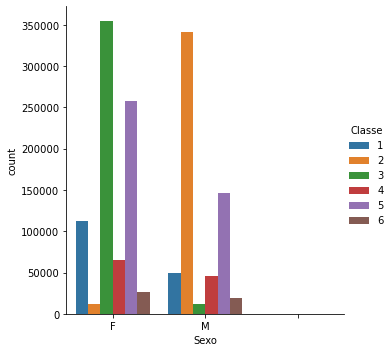

In [224]:
#1: Antes de iniciar o tratamneto de dados, resolvi ver qual seria a relação do varivel 'Sexo' com a variavel 'Classe' , para analisar seu impacto no modelo.

sns.catplot(x ='Sexo', hue ='Classe', kind ="count", data = dataset)

In [225]:
#2: Exclui colunas, que ao meu ver, não são relevantes para análise e futuramente podem atrapalhar o modelo

dataset = dataset.drop(['Unnamed: 0', 'Cidade', 'Estado'], axis=1)

In [226]:
#3: Iniciando análise para o tratamento de dados

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445395 entries, 0 to 1445394
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Identificador_cliente  1445395 non-null  int64  
 1   Empregador             1445395 non-null  float64
 2   qtd_integradas         1445395 non-null  int64  
 3   qtd_NAO_integradas     1445395 non-null  int64  
 4   Taxa_de_juros          1445395 non-null  float64
 5   qtd_integrada_refin    1445395 non-null  int64  
 6   qtd_integrada_port     1445395 non-null  int64  
 7   qtd_integrada_normal   1445395 non-null  int64  
 8   qtd_parcelas           1445353 non-null  float64
 9   valor_principal        1445395 non-null  float64
 10  Sexo                   1445395 non-null  object 
 11  Renda                  1445395 non-null  float64
 12  Idade                  1444849 non-null  float64
 13  Classe                 1445395 non-null  int64  
dtypes: float64(6), int

In [227]:
#4: 'Sexo' é uma variavel não númerica, tive que tranfosmar em numerica para não atrapalhar o modelo. Não vou apenas remove-la pois acho ela se apresenta como uma variavel relevante.
# tentei modificar com esta string dataset['Sexo'].astype('float64'), depois-> dataset['Sexo'] = dataset['Sexo'].apply(lambda x: str(x).replace(",".")), porém estava apresentando muitos erros. Também não tive muito sucesso usando o Dummies, então recorri a string abaixo.

dataset['Sexo'] = dataset['Sexo'].replace('F', 0)
dataset['Sexo'] = dataset['Sexo'].replace('M', 1)

In [228]:
dataset['Sexo'] = pd.to_numeric(dataset['Sexo'], errors='coerce')

In [229]:
#4: Tratando dados nulos

dataset.isnull()

,Identificador_cliente,Empregador,qtd_integradas,qtd_NAO_integradas,Taxa_de_juros,qtd_integrada_refin,qtd_integrada_port,qtd_integrada_normal,qtd_parcelas,valor_principal,Sexo,Renda,Idade,Classe
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445390,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1445391,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1445392,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1445393,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [230]:
dataset.isnull().sum()

Identificador_cliente      0
Empregador                 0
qtd_integradas             0
qtd_NAO_integradas         0
Taxa_de_juros              0
qtd_integrada_refin        0
qtd_integrada_port         0
qtd_integrada_normal       0
qtd_parcelas              42
valor_principal            0
Sexo                     183
Renda                      0
Idade                    546
Classe                     0
dtype: int64

In [231]:
#5.1: Decidi preencher a coluna que apresetou maior número de dados nulos e excluir aquela que apresentou o menor valor, afim de evitar excluir uma grande quantidade de dados que podem ser relevantes para o modelo.

dataset['Idade'] = dataset['Idade'].fillna(dataset['Idade'].mean())
dataset = dataset.dropna(how='any', axis=0)

In [232]:
dataset.isnull().sum().sum()

0

In [233]:
print(dataset['Classe'].value_counts())

5    404815
3    366658
2    354162
1    162399
4    111065
6     46071
Name: Classe, dtype: int64


In [234]:
#6: Iniciando o processo de machine learning, meu objetivo é poder classificar futuros clientes, então meu target é 'Classe'

target = dataset['Classe']
dataset = dataset.drop('Classe', axis=1)

In [235]:
#7:Començando o processo de sepração de dados para treinar o modelo
#obs: até esta etapa não havia retirado a coluna 'Sexo'

x_train, x_val, y_train, y_val = train_test_split(dataset, target, shuffle=True, test_size = 0.3)

In [236]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011619 entries, 183229 to 690540
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Identificador_cliente  1011619 non-null  int64  
 1   Empregador             1011619 non-null  float64
 2   qtd_integradas         1011619 non-null  int64  
 3   qtd_NAO_integradas     1011619 non-null  int64  
 4   Taxa_de_juros          1011619 non-null  float64
 5   qtd_integrada_refin    1011619 non-null  int64  
 6   qtd_integrada_port     1011619 non-null  int64  
 7   qtd_integrada_normal   1011619 non-null  int64  
 8   qtd_parcelas           1011619 non-null  float64
 9   valor_principal        1011619 non-null  float64
 10  Sexo                   1011619 non-null  float64
 11  Renda                  1011619 non-null  float64
 12  Idade                  1011619 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 108.1 MB


In [237]:
#8: Normalizando os dados 

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [238]:

x_train_np = scaler.transform(x_train)
x_val_np = scaler.transform(x_val)

In [239]:
#9: Treinando o modelo.

classificador = LogisticRegression(max_iter=10000)
classificador.fit(x_train_np, y_train)

LogisticRegression(max_iter=10000)

In [240]:
#10: Resultados

classificador.score(x_train_np, y_train)

0.6445479968248916

In [241]:
#11: Analisando a desempenho do modelo nos teste

y_pred = classificador.predict(x_val_np)
y_pred_prob = classificador.predict_proba(x_val_np)

In [242]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.48      0.54     48847
           2       0.61      0.87      0.72    106142
           3       0.69      0.78      0.73    109822
           4       0.13      0.00      0.00     33490
           5       0.65      0.64      0.65    121370
           6       0.00      0.00      0.00     13880

    accuracy                           0.64    433551
   macro avg       0.45      0.46      0.44    433551
weighted avg       0.58      0.64      0.60    433551



In [243]:
#Salvando o dataset, tentei sem precisar salvar porém aparecia mensagem de erro com 'resul not defined'

x_val = x_val.reset_index()
y_val = y_val.reset_index()

X_val = x_val.merge(y_val, on='index')
X_val = X_val.drop('index', axis=1)

X_val['predict'] = y_pred.copy()

In [244]:
X_val.to_csv('dataset_result.csv', index=False)

In [246]:
result = pd.read_csv('dataset_result.csv')

In [247]:
result.head()

,Identificador_cliente,Empregador,qtd_integradas,qtd_NAO_integradas,Taxa_de_juros,qtd_integrada_refin,qtd_integrada_port,qtd_integrada_normal,qtd_parcelas,valor_principal,Sexo,Renda,Idade,Classe,predict
0,1183056,48.0,0,9,1.292805,0,0,0,84.0,8913.470000,1.0,840180.0,60.0,5,2
1,108686,3325.0,0,3,1.279015,0,0,0,51.0,133355.993333,1.0,2163668.5,59.0,2,2
2,1281972,48.0,7,9,1.587626,0,0,7,38.0,7357.960625,1.0,1206000.0,71.0,2,2
3,1442282,26.0,1,2,1.343325,0,0,1,40.0,17874.356667,0.0,2148915.2,44.0,5,5
4,1186172,48.0,1,0,2.549610,0,0,1,24.0,7643.040000,0.0,241200.0,76.0,1,1


Text(0.5, 1.0, 'Comparação visual entre o resultado real e o predito')

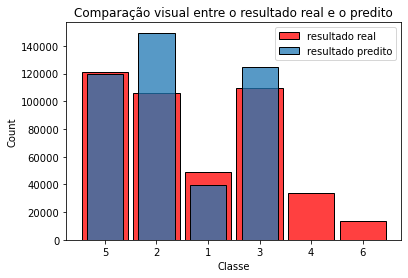

In [256]:
result.Classe = result.Classe.astype(str)
result.predict = result.predict.astype(str) 
sns.histplot(data=result, x='Classe', color='red', multiple="dodge", shrink=0.9)
sns.histplot(data=result, x='predict', multiple="dodge", shrink=0.7)
plt.legend(['resultado real', 'resultado predito'])
plt.title('Comparação visual entre o resultado real e o predito')